In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [8]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(714, 3)

In [13]:
df.sample(5)

,Survived,Age,Fare
133,1,29.0,26.0000
394,1,24.0,16.7000
43,1,3.0,41.5792
184,1,4.0,22.0250
245,0,44.0,90.0000


In [14]:
# Train Test Split

x = df.iloc[:,1:]
y = df.iloc[:,0]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
x_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [19]:
y_train.head()

328    1
73     0
253    0
719    0
666    0
Name: Survived, dtype: int64

In [21]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)


In [22]:
accuracy_score(y_test,y_pred)

0.6223776223776224

In [23]:
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

np.float64(0.6317097026604068)

In [62]:
#                              bins and                strategy must be changable
kbin_age = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='uniform')
kbin_fare = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='uniform')

trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [51]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.fit_transform(x_test)

In [52]:
trf.named_transformers_['first']

,"n_bins n_bins: int or array-like of shape (n_features,), default=5The number of bins to produce. Raises ValueError if ``n_bins < 2``.",10
,"encode encode: {'onehot', 'onehot-dense', 'ordinal'}, default='onehot'Method used to encode the transformed result.- 'onehot': Encode the transformed result with one-hot encoding and return a sparse matrix. Ignored features are always stacked to the right.- 'onehot-dense': Encode the transformed result with one-hot encoding and return a dense array. Ignored features are always stacked to the right.- 'ordinal': Return the bin identifier encoded as an integer value.",'ordinal'
,"strategy strategy: {'uniform', 'quantile', 'kmeans'}, default='quantile'Strategy used to define the widths of the bins.- 'uniform': All bins in each feature have identical widths.- 'quantile': All bins in each feature have the same number of points.- 'kmeans': Values in each bin have the same nearest center of a 1D k-means cluster.For an example of the different strategies see::ref:`sphx_glr_auto_examples_preprocessing_plot_discretization_strategies.py`.",'uniform'
,"quantile_method quantile_method: {""inverted_cdf"", ""averaged_inverted_cdf"",""closest_observation"", ""interpolated_inverted_cdf"", ""hazen"",""weibull"", ""linear"", ""median_unbiased"", ""normal_unbiased""},default=""linear""Method to pass on to np.percentile calculation when usingstrategy=""quantile"". Only `averaged_inverted_cdf` and `inverted_cdf`support the use of `sample_weight != None` when subsampling is notactive... versionadded:: 1.7",'warn'
,"dtype dtype: {np.float32, np.float64}, default=NoneThe desired data-type for the output. If None, output dtype isconsistent with input dtype. Only np.float32 and np.float64 aresupported... versionadded:: 0.24",None
,"subsample subsample: int or None, default=200_000Maximum number of samples, used to fit the model, for computationalefficiency.`subsample=None` means that all the training samples are used whencomputing the quantiles that determine the binning thresholds.Since quantile computation relies on sorting each column of `X` andthat sorting has an `n log(n)` time complexity,it is recommended to use subsampling on datasets with avery large number of samples... versionchanged:: 1.3 The default value of `subsample` changed from `None` to `200_000` when `strategy=""quantile""`... versionchanged:: 1.5 The default value of `subsample` changed from `None` to `200_000` when `strategy=""uniform""` or `strategy=""kmeans""`.",200000
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for subsampling.Pass an int for reproducible results across multiple function calls.See the `subsample` parameter for more details.See :term:`Glossary `... versionadded:: 1.1",None


In [53]:
trf.named_transformers_['first'].n_bins


10

In [54]:
trf.named_transformers_['second'].n_bins

10

In [55]:
trf.named_transformers_['first'].bin_edges_


array([array([ 1. ,  7.1, 13.2, 19.3, 25.4, 31.5, 37.6, 43.7, 49.8, 55.9, 62. ])],
      dtype=object)

In [56]:
output = pd.DataFrame({
    'age':x_train['Age'],
    'age_trf':x_train_trf[:,0],
    'fare':x_train['Fare'],
    'fare_trf':x_train_trf[:,1]
})

In [57]:
output['age_labels'] = pd.cut(x=x_train['Age'],
                              bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=x_train['Fare'],
                               bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [58]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
654,18.0,2.0,6.7500,0.0,"(13.2, 19.3]","(0.0, 51.233]"
148,36.5,4.0,26.0000,0.0,"(31.5, 37.6]","(0.0, 51.233]"
302,19.0,2.0,0.0000,0.0,"(13.2, 19.3]",NaN
474,22.0,2.0,9.8375,0.0,"(19.3, 25.4]","(0.0, 51.233]"
540,36.0,4.0,71.0000,1.0,"(31.5, 37.6]","(51.233, 102.466]"


In [59]:
clf = DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)
y_pred2 = clf.predict(x_test)

c:\Users\LENOVO THINKBOOK\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [60]:
accuracy_score(y_test,y_pred2)

0.6013986013986014

In [61]:
x_trf = trf.fit_transform(x)
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

np.float64(0.6359350547730828)

In [81]:
# function for all of this 


def descritize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)


    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])

    x_trf = trf.fit_transform(x)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy')))


    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title('Age_Before')

    plt.subplot(122)
    plt.hist(x_trf[:,0],color='green')
    plt.title('Age_After')


    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Fare'])
    plt.title('Fare_Before')

    plt.subplot(122)
    plt.hist(x_trf[:,1],color='green')
    plt.title('Fare_After')
    plt.show()


0.6358763693270735


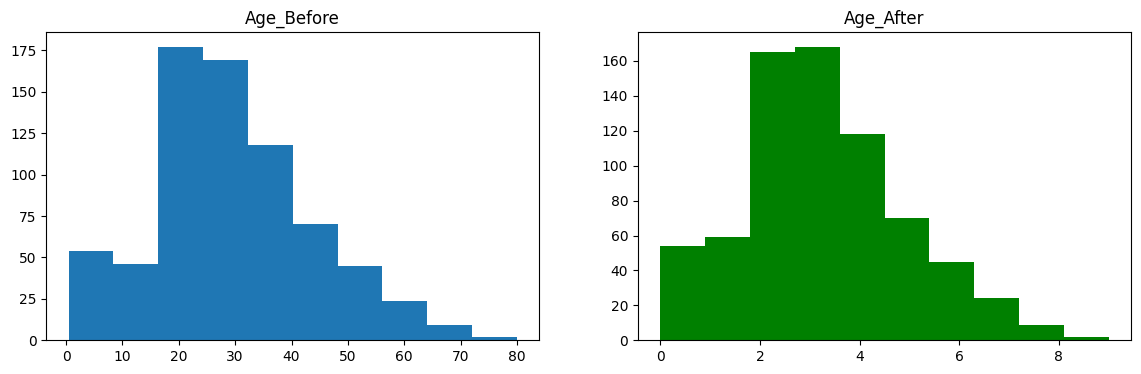

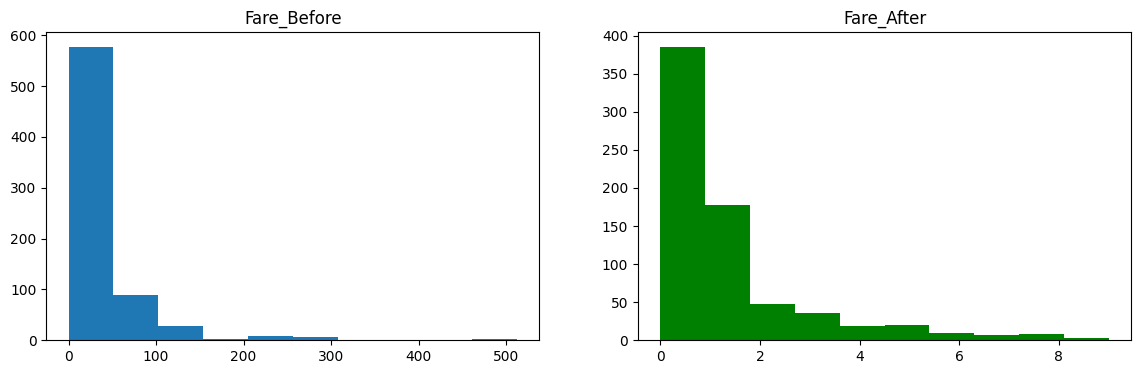

In [89]:
descritize(10,'kmeans')